## Análisis de la colección TCE60

Este ejemplo muestra cómo analizar el dataset generado a partir de los documentos TEI originales en XML. Se ha creado un fichero en formato CSV que es posible analizar con la librería Pandas de Python. 

El corpus original se puede consultar en la Biblioteca Virtual Miguel de Cervantes:
https://www.cervantesvirtual.com/portales/teatro_clasico_espanol/obra/canon-60-la-coleccion-esencial-del-tc12-teatro-clasico-espanol/

La colección se basa en los parlamentos de las obras incluidas en el corpus TCE60 organizados a modo de registro (idRegistro, idAutoridad, Personaje, Texto) 

### Importamos las librerías de Python

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
import spacy
from collections import Counter
from wordcloud import WordCloud

#### Clase Corpus_TEC60
Se ha creado una clase en Python que permite cargar y analizar la colección en formato CSV. A continuación, se detallan los diferentes métodos disponibles para analizar su contenido. 

In [14]:
class Corpus_TCE60:
    def __init__(self, path_csv, obra):
        
        self.obra = obra + '.xml'
        self.df = pd.read_csv (path_csv, sep=';')
        self.df = self.df[self.df['Registro'] == self.obra]
        self.NER = spacy.load("es_core_news_sm")
    
    # Recupera el texto de la obra   
    def getText(self):
        self.df = self.df.reset_index()  # make sure indexes pair with number of rows
    
        textoObra = ""
        for index, row in self.df.iterrows():
            textoObra = textoObra + row['Contenido texto']
        return textoObra
    
    def getNER(self):
        texto = self.getText()
        entidades = self.NER(texto);
        
        return entidades
    
    def countPER(self, entidades):
         print("count tipo PER")
         personas = []
         for ent in entidades.ents:
             if (ent.label_ == 'PER'):
                 personas.append(ent.text)

             personas_counter = Counter(personas)

         df = pd.DataFrame(personas_counter.most_common(), columns=['word', 'count'])
         self.wordcloud(df)
         
    def countLOC(self, entidades):
         print("count tipo LOC")
         personas = []
         for ent in entidades.ents:
             if (ent.label_ == 'LOC'):
                 personas.append(ent.text)

             personas_counter = Counter(personas)

         df = pd.DataFrame(personas_counter.most_common(), columns=['word', 'count'])
         self.wordcloud(df)
      
    def wordcloud(self, df):
        data = dict(zip(df['word'].tolist(), df['count'].tolist()))
        wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)
        
        plt.figure(figsize=(10, 10))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis('off')
        plt.show()
         
    def getNERInfo(self, entidades):
        for ent in entidades.ents:
            print(ent.text + ' - ' + str(ent.start_char) + ' - ' + str(ent.end_char) +' - '+ ent.label_ + ' - '+str(spacy.explain(ent.label_)))         

### Inicializamos la clase y ejecutamos los diferentes métodos

Seleccionamos el registro https://data.cervantesvirtual.com/manifestation/707442 que corresponde a "El caballero de Olmedo : tragicomedia / Lope de Vega"

In [19]:
corpus = Corpus_TCE60('../data/procesado.csv', '707442')
entidades = corpus.getNER()

### Podemos consultar el resultado del reconocimiento de entidades 

In [20]:
corpus.getNERInfo(entidades)

mí solo naciste - 751 - 766 - PER - Named person or family.
quedaste.¿A mí - 784 - 798 - PER - Named person or family.
forastero?A ti. - 800 - 815 - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
tiene?Amor. - 902 - 913 - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
¿ - 1021 - 1022 - LOC - Non-GPE locations, mountain ranges, bodies of water
propria.¡Oh Fabia! ¡Oh retrato - 1037 - 1067 - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Honor - 1221 - 1226 - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
vano
	vergüenza - 1302 - 1318 - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
mío - 1329 - 1332 - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Un deseo
es dueño de mi albedrío. - 1377 - 1411 - MISC - Miscellaneous entities, e.g. events, nationalities, products or wor

## Mostramos las nubes de personas y lugares

count tipo PER


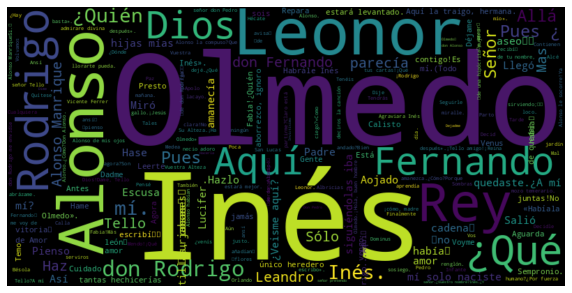

In [17]:
corpus.countPER(entidades)

count tipo LOC


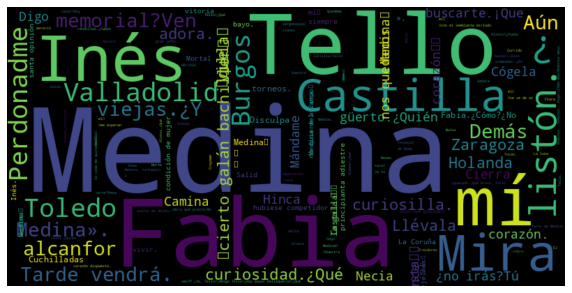

In [18]:
corpus.countLOC(entidades)